<a href="https://colab.research.google.com/github/sairamadithya/covid-prediction/blob/main/covid_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


this is a small dataset and is good for practice. it has about 224 training images and 60 validation images.
the zip file is in the github profile

In [2]:
!unzip '/content/drive/MyDrive/Copy of Copy of CovidDataset.zip'

Archive:  /content/drive/MyDrive/Copy of Copy of CovidDataset.zip
   creating: CovidDataset/
   creating: CovidDataset/Train/
   creating: CovidDataset/Train/Covid/
  inflating: CovidDataset/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: CovidDataset/Train/Covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: CovidDataset/Train/Covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: CovidDataset/Train/Covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: CovidDataset/Train/Covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: CovidDataset/Train/Covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: CovidDataset/Train/Covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: CovidDataset/Train/Covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: CovidDataset/Train/Covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: CovidDataset/Train/Covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: CovidDataset/Tra

#IMPORTING ESSENTIAL LIBRARIES

In [3]:
#importing the essential libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image

#IMAGE PROCESSING

In [4]:
#image preprocessing
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True)
 
test_dataset = image.ImageDataGenerator(rescale=1./255) #no transformations are applied to the testing dataset to maintain its originality

this is a small dataset hence it is recommended to have less batch size

In [5]:

train_generator = train_datagen.flow_from_directory(
    '/content/CovidDataset/Train',
    target_size = (224,224),
    batch_size = 8,
    class_mode = 'binary')
validation_generator = test_dataset.flow_from_directory(
    '/content/CovidDataset/Val',
    target_size = (224,224),
    batch_size = 8,
    shuffle=True,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [6]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

# MODEL CREATION

In [7]:
input_shape = (224, 224, 3)

In [8]:

model = Sequential()
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(GaussianNoise(0.5))
model.add(Flatten())
model.add(Dense(128, activation = 'sigmoid'))
model.add(GaussianNoise(0.5))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       7

#MODEL COMPILATION

In [9]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

#MODEL TRAINING

steps_per_epoch*batch_size= images in taining dataset

steps_per_epoch= 224/8= 28

model check point is used to save the best model i.e. the model which has the least loss of all

In [10]:
#### Train the model
from datetime import datetime
from keras.callbacks import ModelCheckpoint
 
checkpoint = ModelCheckpoint(filepath='mymodel.hdf5', 
                               verbose=2, save_best_only=True) 
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)
callbacks = [checkpoint,callback]
start = datetime.now()
history = model.fit(
    train_generator,
    steps_per_epoch=28,
    epochs =20,
    validation_data = validation_generator,
    validation_steps=1,
    callbacks=callbacks
)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/20
28/28 [==============================] - 38s 325ms/step - loss: 0.7795 - accuracy: 0.5625 - val_loss: 0.5462 - val_accuracy: 1.0000

Epoch 00001: val_loss improved from inf to 0.54623, saving model to mymodel.hdf5
Epoch 2/20
28/28 [==============================] - 9s 320ms/step - loss: 0.6558 - accuracy: 0.6741 - val_loss: 0.4078 - val_accuracy: 0.6250

Epoch 00002: val_loss improved from 0.54623 to 0.40778, saving model to mymodel.hdf5
Epoch 3/20
28/28 [==============================] - 9s 314ms/step - loss: 0.3426 - accuracy: 0.8527 - val_loss: 0.0787 - val_accuracy: 1.0000

Epoch 00003: val_loss improved from 0.40778 to 0.07872, saving model to mymodel.hdf5
Epoch 4/20
28/28 [==============================] - 9s 314ms/step - loss: 0.1823 - accuracy: 0.9286 - val_loss: 0.1413 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 0.07872
Epoch 5/20
28/28 [==============================] - 9s 330ms/step - loss: 0.2563 - accuracy: 0.8795 - val_loss: 0.0152 - val_

# MODEL EVALUATION

In [11]:
model.evaluate(train_generator)

28/28 [==============================] - 8s 297ms/step - loss: 0.0403 - accuracy: 0.9911


[0.0403253398835659, 0.9910714030265808]

In [12]:
model.evaluate(validation_generator)

8/8 [==============================] - 2s 276ms/step - loss: 0.0318 - accuracy: 0.9833


[0.03175388649106026, 0.9833333492279053]

the model has achieved trainin accuracy of 98.6% 

and validation accuracy of 98.3%

#MODEL PLOTS

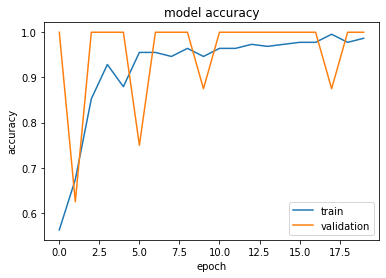

In [13]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

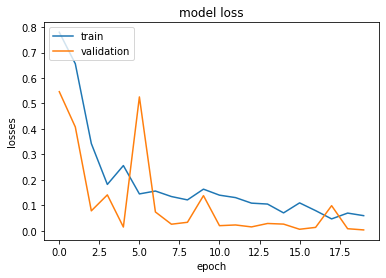

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('losses')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# MODEL PREDICTION & OUTPUT VISUALISATION

the normal healthy chest x-rays do not rule not COVID. this is an interesting topic which is still in debate. hence while searching for images used covid negative images

The uploaded chest x-ray is detected as COVID:POSITIVE. you have been detected positive for the nCov-2019 virus. Please isolate yourself to break the chain. We pray for your speedy recovery.
THANK YOU FOR USING THIS PROJECT. LEAD AN HEALTHY LIFE!!!!


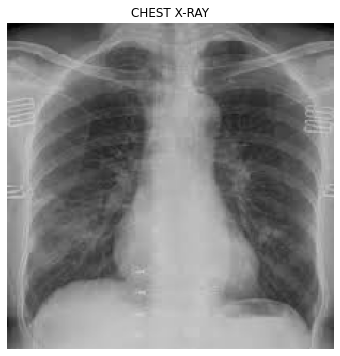

In [21]:
from keras.preprocessing import image
img = image.load_img('covid.jpeg',target_size=(224,224))
imag = image.img_to_array(img)
image = np.expand_dims(img,axis=0)   ### flattening
ypred = model.predict(image)
if ypred>0.5:
  ypred='NEGATIVE. Take the anti-PCR test if needed.'
else:
  ypred='POSITIVE. you have been detected positive for the nCov-2019 virus. Please isolate yourself to break the chain. We pray for your speedy recovery.'
def plot_img(img):
  plt.figure(figsize=(6,6))
  plt.imshow(img)  
  plt.title('CHEST X-RAY')
  plt.axis('off')
plot_img(img)
print('The uploaded chest x-ray is detected as COVID:'+str(ypred))
print('THANK YOU FOR USING THIS PROJECT. LEAD AN HEALTHY LIFE!!!!')

